In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
import warnings

In [5]:
warnings.filterwarnings("ignore")

# Univariate Analysis

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198.0,1.0,-1.0,0.0,unknown,no


In [7]:
# find categorical column and numerical column

cat = []
num = []

for column in data.columns:
    if data [column].nunique() > 12:
        num.append(column)
    else:
        cat.append(column)

In [8]:
cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [9]:
num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

## KOLOM NUMERIC

In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45663.000000,45663.000000,45663.000000,45317.000000,45281.000000,45446.000000,45395.000000
mean,40.937389,1363.058012,15.811248,258.226582,2.764250,40.166857,0.579667
std,10.616812,3049.909173,8.319972,257.642594,3.097611,100.063270,2.303390
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.500000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
data[cat].describe()

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45663,45663,45663,45663,45663,45663,45663,45663,45663,45355
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9816,27473,23418,44839,25380,38350,29574,13910,37344,40055


In [12]:
skew_age = data["age"].skew()
skew_balance = data["balance"].skew()
skew_day = data["day"].skew()
skew_duration = data["duration"].skew()
skew_campaign = data["campaign"].skew()
skew_pdays = data["pdays"].skew()
skew_previous = data["previous"].skew()

print("skew pada kolom age adalah", skew_age)
print("skew pada kolom balance adalah", skew_balance)
print("skew pada kolom day adalah", skew_day)
print("skew pada kolom duration adalah", skew_duration)
print("skew pada kolom campaign adalah", skew_campaign)
print("skew pada kolom pdays adalah", skew_pdays)
print("skew pada kolom previous adalah", skew_previous)

skew pada kolom age adalah 0.6839684926561165
skew pada kolom balance adalah 8.36764674270827
skew pada kolom day adalah 0.09321515254111497
skew pada kolom duration adalah 3.141889708823745
skew pada kolom campaign adalah 4.90260374555541
skew pada kolom pdays adalah 2.6144357546890156
skew pada kolom previous adalah 41.70513655712804


In [13]:
data.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration     346
campaign     382
pdays        217
previous     268
poutcome       0
y            308
dtype: int64

### DISPLOT

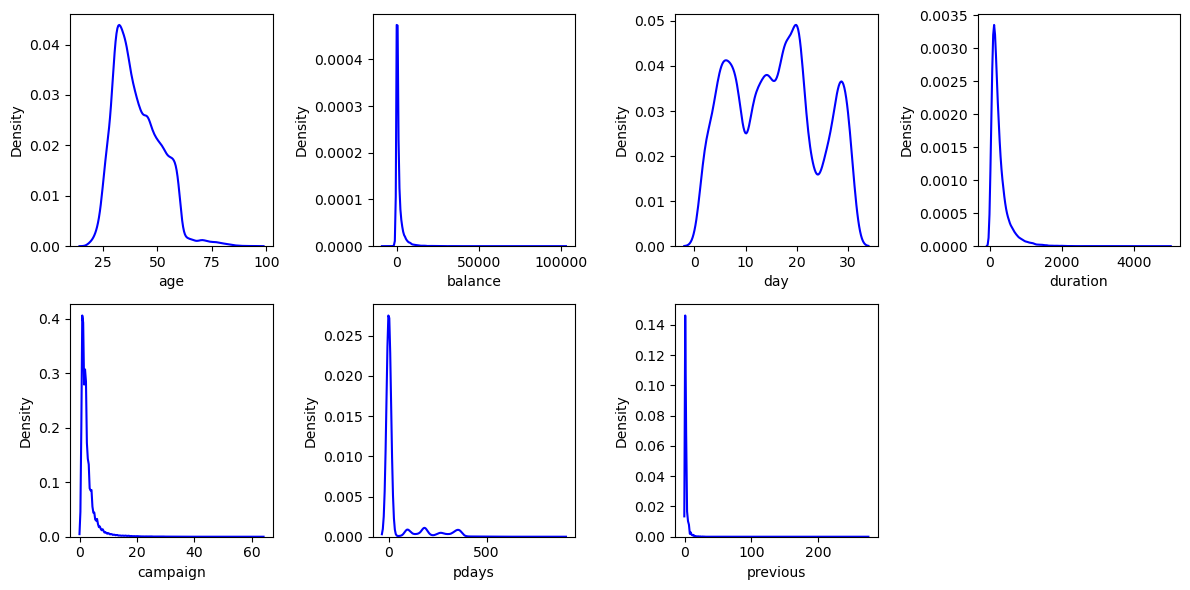

In [34]:

features = num
plt.figure(figsize=(12, 6))

for i in range (0, len (features)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=data[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

#### penjelasan untuk distplot

- balance : distribusi menunjukkan cenderung ke kanan/positive skew. Kemudian, dari grafik menunjukkan user banyak yang mempunyai saldo tahunan yang rendah
- age : distribusi cenderung ke kanan/positive skew, artinya kebanyakan user berada direntang usia 30-40 tahun(puncak diantara 30-40).
- day : distribusinya tidak normal (banyak puncak tinggi yang menunjukkan pola tertentu dari hari terakhir kontak dalam sebulan)
- duration : distribusinya ke kanan/positive skew, dimana durasi kontak terlihat dibawah 2000 detik yang menunjukkan kontak ke user cenderung singkat.
- campaign : distribusi ke kanan/positive skew, dimana menunjukkan sebagian user dihubungi hanya beberapa kali.
- Pdays : distribusi cenderung ke kanan/positive skew, dimana puncak terlihat di angka -1 yang menunjukkan sebagian besar user belum pernah dihubungi sebelumnya.
- previous : distribusi cenderung ke kanan/positive skew, dimana sebagian besar user belum pernah dikontak.

### BOXPLOT

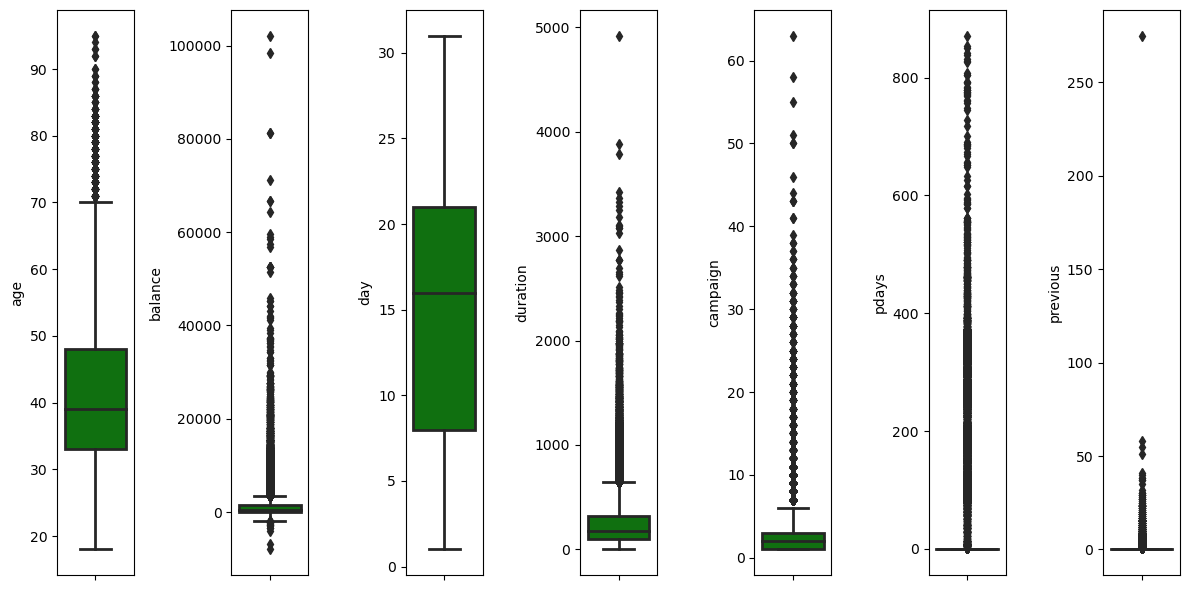

In [28]:
features = num
plt.figure(figsize=(12, 6))

for i in range (len (features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='green', linewidth=2)
    plt.tight_layout()

#### Penjelasan untuk boxplot

- Balance : boxplot terlihat condong ke bawah dengan beberapa outliers. Median yang rendah menunjukkan kebanyakan user memiliki saldo rendah.
- Age : garis median terlihat dipertengahan usia 30-an, rentang usia sebagian user diusia 20-an sampai 60-an. Terdapat outliers yang menunjukkan ada beberapa user yang mempunyai usia dibawah 20 tahun dan diatas 60 tahun.
- day : median terlihat dipertengahan bulan, tidak ada outliers.
- duration : garis median terlihat rendah yang menunjukkan sebagian besar durasi kontak ke user berlangsung singkat. Kemudian, terdapat banyak outliers yang menunjukkan bahwa ada beberapa user yang mempunyai durasi kontak sangat panjang.
- campaign : garis median yang rendah menunjukkan bahwa kebanyakan user dihubungi hanya beberapa kali. Kemudian, terdapat outliers yang artinya ada beberapa user yang dihubungi beberapa kali diatas rata-rata.
- pdays : banyak terdapat outliers yang menunjukkan sebagian besar user belum pernah dihubungi, atau sudah lama tidak dihubungi kembali.
- previous : outliers terlihat menumpuk didekat angka 0 yang menunjukkan sebagian user tidak pernah dikontak sebelumnya. Namun, ada beberapa outliers yang menunjukkan ada beberapa user yang memiliki jumlah kontak yang tinggi. 

### VIOLIN PLOT

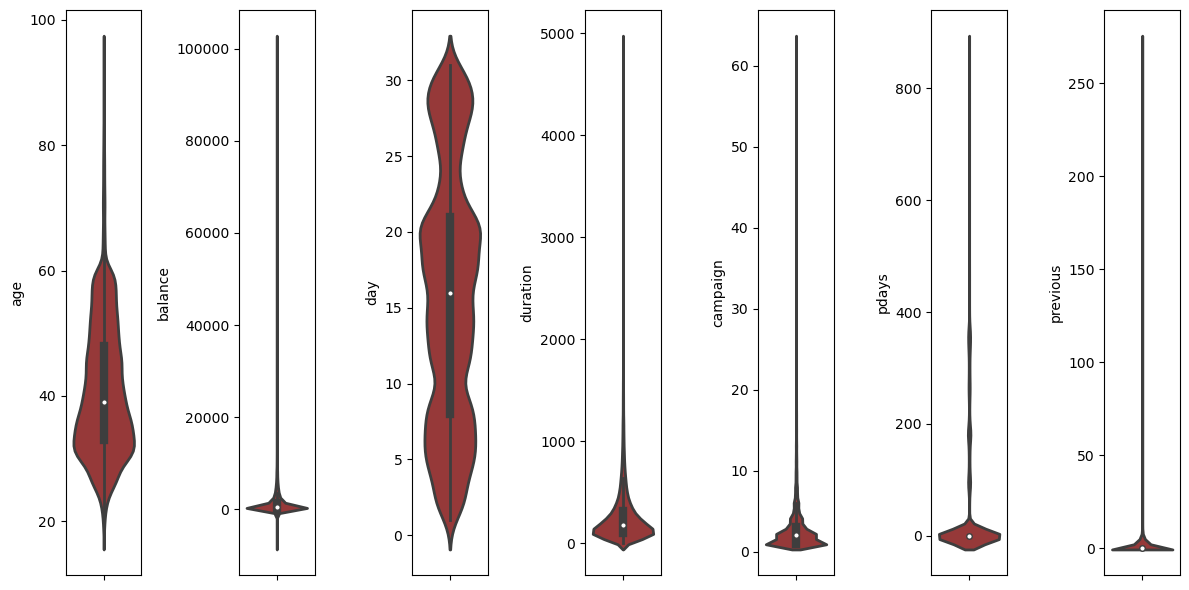

In [27]:
features = num
plt.figure(figsize=(12, 6))

for i in range (len (features)):
    plt.subplot(1, len(features), i+1)
    sns.violinplot(y=data[features[i]], color='brown', linewidth=2)
    plt.tight_layout()

#### Penjelasan untuk violin plot

- Age : dari bentuk violin terlihat bahwa kebanyakan user memiliki umur direntang 30-60 tahun. Terlihat sebagian kecil outlier yang menunjukkan ada beberapa user yang memiliki umur sangat muda dan sangat tua.
- Balance : distribusinya terlihat melebar didekat angka 0, menunjukkan sebagian user memiliki saldo yang rendah. Namun, terdapat outliers yang mengindikasikan ada beberapa user yang memiliki saldo yang tinggi.
- Day : distribusinya hampir seragam, tidak terlihat cenderung ke kiri atau ke kanan. Namun, terlihat sebagian user terakhir dikontak berada di pertengahan bulan.
- Duration : distribusinya terlihat melebar ke bawah yang menunjukkan sebagian besar durasi kontak yang dilakukan singkat.
- Campaign : distribusinya cenderung melebar dibawah yang mengindikasikan sebagian user hanya dihubungi beberapa kali selama periode campaign. Kemudian, terlihat beberapa outliers yang menunjukkan bahwa ada beberapa user yang dihubungi berkali-kali selama periode campaign.
- Pdays : bentuk violin yang melebar dibawah menunjukkan sebagian besar user tidak pernah dihubungi sebelumnya(-1). Kemudian, terdapat outliers yang menunjukkan ada beberapa user yang memiliki jumlah hari sangat tinggi(sudah lama sekali sejak terakhir dihubungi).
- Previous : distribusinya terlihat melebar diangka 0 yang menunjukkan sebagian besar user belum pernah dikontak sebelumnya. Namun, terdapat outliers yang menunjukkan bahwa ada beberapa klien yang dihubungi beberapa kali sebelumnya.

### KESIMPULAN UNTUK KOLOM NUMERIC 

- berdasarkan analisis skew dari masing-masing kolom, diketahui bahwa kolom balance, duration, campaign, pdays, dan previous termasuk right-skewed dan highly skewed. Untuk kolom age termasuk right-skewed juga, namun slightly skewed. Dan untuk kolom day termasuk almost symmetrics karena skew valuenya hampir mendekati 0.
- terdapat kolom yang memiliki value null = duration, campaign, pdays, previous

**untuk analisis per kolom**

**Age :**
   - Mayoritas pengguna berada dalam rentang usia 30-60 tahun, dengan beberapa outlier yang menunjukkan keberadaan user yang sangat muda dan sangat tua.
   - Distribusi usia terlihat agak merata, dengan median di sekitar pertengahan 30-an.
   - Terdapat outlier yang menunjukkan keberadaan pengguna di bawah 20 tahun dan di atas 60 tahun.
   
**Balance:**
   - Distribusi saldo cenderung condong ke arah nilai rendah, dan ada outlier yaitu beberapa pengguna memiliki saldo tinggi.
   - Box plot menunjukkan median saldo yang rendah, menunjukkan bahwa kebanyakan user memiliki rata-rata saldo yang rendah.

**Day:** Distribusi hari kontak terlihat cukup merata, terlihat sebagian besar user terakhir dihubungi berada di pertengahan bulan.

**Duration:** Sebagian besar durasi kontak ke user singkat, namun terdapat beberapa outlier yang menunjukkan durasi kontak yang sangat panjang.

**Campaign**: Sebagian besar user dihubungi hanya beberapa kali. Namun, ada beberapa user yang dihubungi berkali-kali selama periode campaign.

**Pdays**: Sebagian besar user tidak pernah dihubungi sebelumnya, ditunjukkan oleh nilai -1 pada sebagian besar distribusi. Namun, terdapat beberapa outlier yang menunjukkan sebagian user sudah lama tidak dihubungi kembali.

**Previous:** Sebagian besar user belum pernah dikontak sebelumnya, namun terdapat beberapa outlier yang menunjukkan sebagian user telah dikontak beberapa kali sebelumnya.